In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

In [2]:
install.packages("titanic")
install.packages("broom")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(ggplot2)
library(dplyr)
library(titanic)
library(broom)

In [4]:
data("titanic_train")

In [6]:
titanic <- titanic_train

In [7]:
head(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [8]:
summary(titanic)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [9]:
str(titanic)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [10]:
colSums(is.na(titanic))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [11]:
titanic$Age[is.na(titanic$Age)] <- median(titanic$Age, na.rm = TRUE)


In [12]:
titanic$Survived <- as.factor(titanic$Survived)
titanic$Pclass <- as.factor(titanic$Pclass)
titanic$Sex <- as.factor(titanic$Sex)

In [13]:
gender_survival_table <- table(titanic$Sex, titanic$Survived)

In [14]:
chi_test_gender <- chisq.test(gender_survival_table)

In [15]:
chi_test_gender


	Pearson's Chi-squared test with Yates' continuity correction

data:  gender_survival_table
X-squared = 260.72, df = 1, p-value < 2.2e-16


In [16]:
class_survival_table <- table(titanic$Pclass, titanic$Survived)

In [17]:
chi_test_class <- chisq.test(class_survival_table)

In [18]:
chi_test_class


	Pearson's Chi-squared test

data:  class_survival_table
X-squared = 102.89, df = 2, p-value < 2.2e-16


In [19]:
linear_model <- lm(Age ~ Pclass + Sex, data = titanic)

In [20]:
summary(linear_model)


Call:
lm(formula = Age ~ Pclass + Sex, data = titanic)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.391  -6.942   1.058   5.058  47.058 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.8674     0.9581  36.393  < 2e-16 ***
Pclass2      -7.1230     1.2180  -5.848 6.98e-09 ***
Pclass3     -11.3681     0.9986 -11.384  < 2e-16 ***
Sexmale       3.4432     0.8595   4.006 6.69e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.14 on 887 degrees of freedom
Multiple R-squared:  0.1336,	Adjusted R-squared:  0.1307 
F-statistic:  45.6 on 3 and 887 DF,  p-value: < 2.2e-16


In [21]:
tidy_linear_model <- tidy(linear_model)
tidy_linear_model

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),34.867372,0.9580690,36.393383,3.768773e-178
Pclass2,-7.122987,1.2179696,-5.848247,6.980574e-09
Pclass3,-11.368110,0.9986083,-11.383954,4.036165e-28
Sexmale,3.443177,0.8595109,4.005972,6.694048e-05


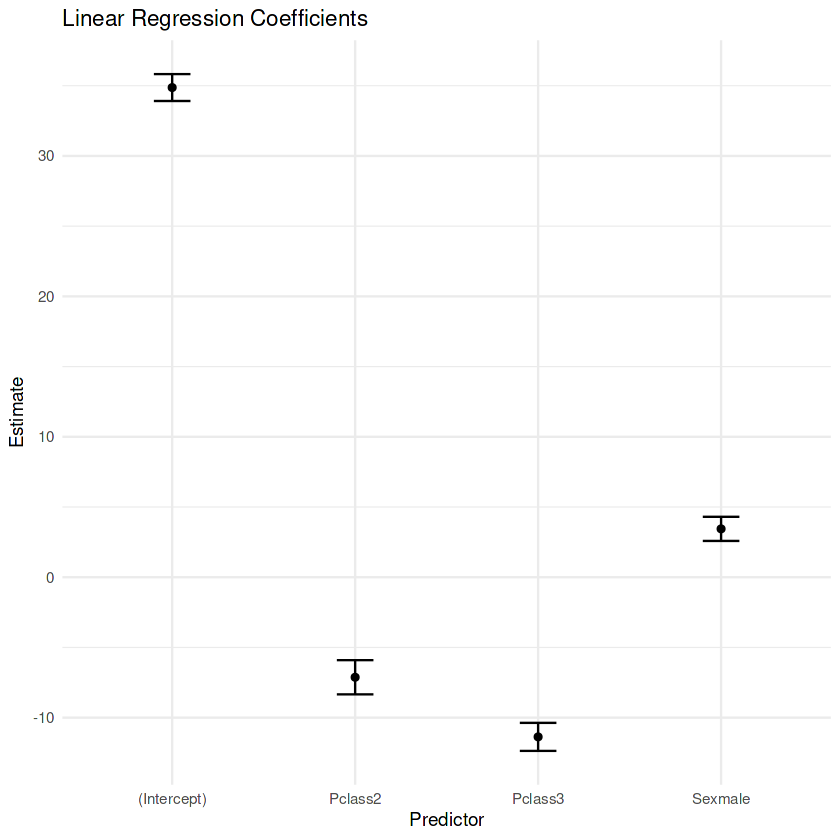

In [22]:
ggplot(tidy_linear_model, aes(x = term, y = estimate)) +
  geom_point() +
  geom_errorbar(aes(ymin = estimate - std.error, ymax = estimate + std.error), width = 0.2) +
  labs(title = "Linear Regression Coefficients",
       x = "Predictor",
       y = "Estimate") +
  theme_minimal()